In [1]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis.pca import PCA
from MDAnalysisTests.datafiles import PSF, DCD

plt.style.use('ggplot')

In [2]:
import numpy as np
import MDAnalysis

In [3]:
u = mda.Universe(PSF, DCD)

In [4]:
pca = PCA(u, select='protein and name CA', verbose=True).run()

ca = u.select_atoms('protein and name CA')
reduced_data = pca.transform(ca, n_components=2)

Mean Calculation Step   98/98 [100.0%]
Step    98/98 [100.0%]


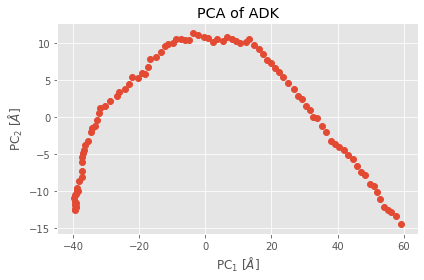

In [5]:
fig, ax = plt.subplots()
ax.plot(reduced_data[:, 0], reduced_data[:, 1], 'o')

ax.set(xlabel=r'PC$_1$ [$\AA$]', ylabel=r'PC$_2$ [$\AA$]', title='PCA of ADK')
fig.tight_layout()

In [6]:
import MDAnalysis as mda
import MDAnalysis.analysis.pca as pca
from MDAnalysis.coordinates.base import Timestep
from MDAnalysisTests.datafiles import PSF, DCD

import numpy as np
import os
import glob

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.ticker as ticker
%matplotlib inline

In [7]:
datapath = os.path.join('PCA_tutorial', 'AdK')
selection = 'backbone'
stepsize = 1
npc = 5


os.makedirs(datapath, exist_ok=True)
for dirname in ('pcs', 'variances', 'cumulative_variances', 
                'mean_atoms', 'transforms', 
                os.path.join('trajectories', 'PC'),
                'images'):
    os.makedirs(os.path.join(datapath, dirname), exist_ok=True)

In [8]:
ag = u.select_atoms(selection)

In [9]:
pc = pca.PCA(u, select=selection, align=True, verbose=True, step=stepsize)
pc.run()

C:\Users\Ari\Miniconda3\envs\mdaenv\lib\site-packages\MDAnalysis\analysis\base.py:116: DeprecationWarning: Setting the following kwargs should be done in the run() method: step
  DeprecationWarning)
Mean Calculation Step   98/98 [100.0%]
Step    98/98 [100.0%]


In [10]:
pc_pc = pc.p_components
np.save(os.path.join(datapath, 'pcs', 'pcomponents.npy'), pc_pc)

In [11]:
pc_vars = pc.variance
np.save(os.path.join(datapath,'variances', 'vars.npy'), pc_vars)

In [12]:
pc.cumulated_variance[npc]

0.9995688527360238

In [13]:
npc

5

In [14]:
pc_cvars = pc.cumulated_variance
np.save(os.path.join(datapath, 'cumulative_variances',
                     'cumulativevars.npy'), pc_cvars)

In [15]:
pc_ma = pc.mean_atoms
pc_ma.write(os.path.join(datapath, 'mean_atoms' , 'meanatoms.pdb'))

C:\Users\Ari\Miniconda3\envs\mdaenv\lib\site-packages\MDAnalysis\coordinates\PDB.py:916: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
C:\Users\Ari\Miniconda3\envs\mdaenv\lib\site-packages\MDAnalysis\coordinates\PDB.py:916: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
C:\Users\Ari\Miniconda3\envs\mdaenv\lib\site-packages\MDAnalysis\coordinates\PDB.py:916: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  "".format(attrname, default))
C:\Users\Ari\Miniconda3\envs\mdaenv\lib\site-packages\MDAnalysis\coordinates\PDB.py:916: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  "".format(attrname, default))


In [16]:
pc_transform = pc.transform(ag, n_components=npc)
np.save(os.path.join(datapath, 'transforms', str(npc)+'components.npy'), pc_transform)

In [17]:
tpcs = np.load(os.path.join(datapath, 'transforms', 
                            str(npc)+'components.npy'))

In [18]:
columns=[]
for i in range(npc):
    columns.append('PC'+str(i))

In [19]:
df = pd.DataFrame(tpcs, columns=columns)
df['time']=df.index
df = df.reset_index(drop=True)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df[::stepsize]

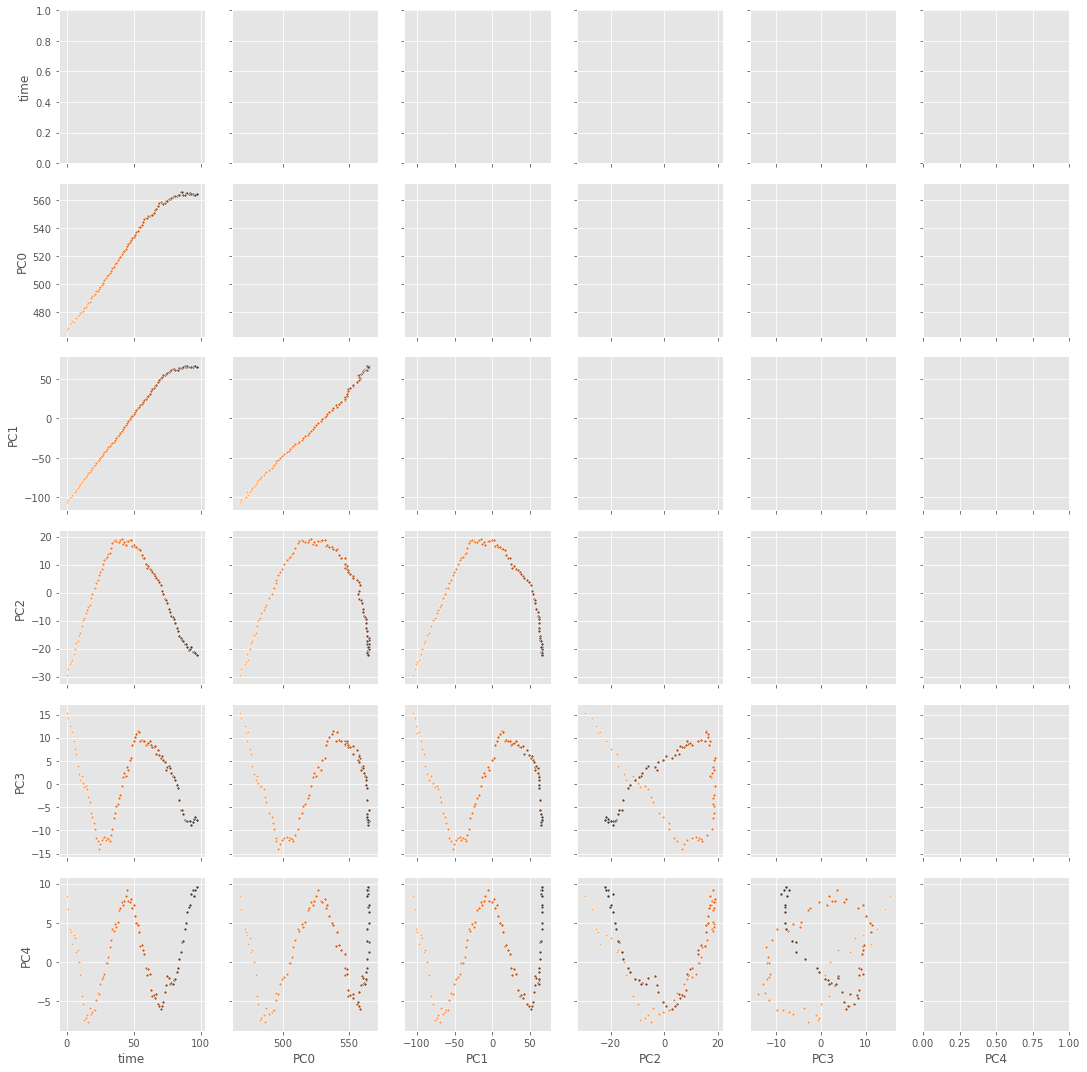

In [20]:
g = sns.PairGrid(df, hue='time', 
                 palette=reversed(sns.color_palette('Oranges_d', n_colors=len(df))))
g.map_lower(plt.scatter, edgecolor="white", marker='.')
g.savefig(os.path.join(datapath,'images', 'PCs.pdf'))
g.savefig(os.path.join(datapath,'images', 'PCs.png'))

In [21]:
cvars = np.load(os.path.join(datapath, 'cumulative_variances', 'cumulativevars.npy'))

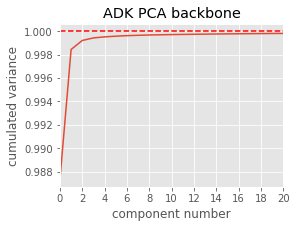

In [22]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
ax.set_title('ADK PCA '+selection)
ax.set_xlabel('component number')
ax.set_ylabel('cumulated variance')
ax.set_xlim(None, 20)
ax.plot(cvars)
ax.axhline(y=1, color='r', linestyle='--')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))